In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 4.2 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 4.0 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 3.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.7 MB/s et

In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Stocks list
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Download stock data with `group_by='ticker'` to get simpler structure
data = yf.download(stocks, start='2020-01-01', group_by='ticker')

# Extract 'Close' prices (since 'Adj Close' is missing)
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in stocks})
print(close_prices)

# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Monte Carlo simulation parameters
num_portfolios = 10000
num_stocks = len(stocks)

results = np.zeros((3, num_portfolios))

# Run simulations
for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)

    port_return = np.sum(returns.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = port_return / port_volatility

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio

[*********************100%***********************]  5 of 5 completed


                  AAPL        GOOG        MSFT        AMZN        TSLA
Date                                                                  
2020-01-02   72.620834   68.046204  153.042313   94.900497   28.684000
2020-01-03   71.914818   67.712273  151.136642   93.748497   29.534000
2020-01-06   72.487862   69.381882  151.527313   95.143997   30.102667
2020-01-07   72.146927   69.338577  150.145737   95.343002   31.270666
2020-01-08   73.307526   69.885002  152.537308   94.598503   32.809334
...                ...         ...         ...         ...         ...
2025-05-30  200.850006  172.850006  460.359985  205.009995  346.459991
2025-06-02  201.699997  170.369995  461.970001  206.649994  342.690002
2025-06-03  203.270004  167.710007  462.970001  205.710007  344.269989
2025-06-04  202.820007  169.389999  463.869995  207.229996  332.049988
2025-06-05  200.630005  169.809998  467.679993  207.910004  284.700012

[1364 rows x 5 columns]


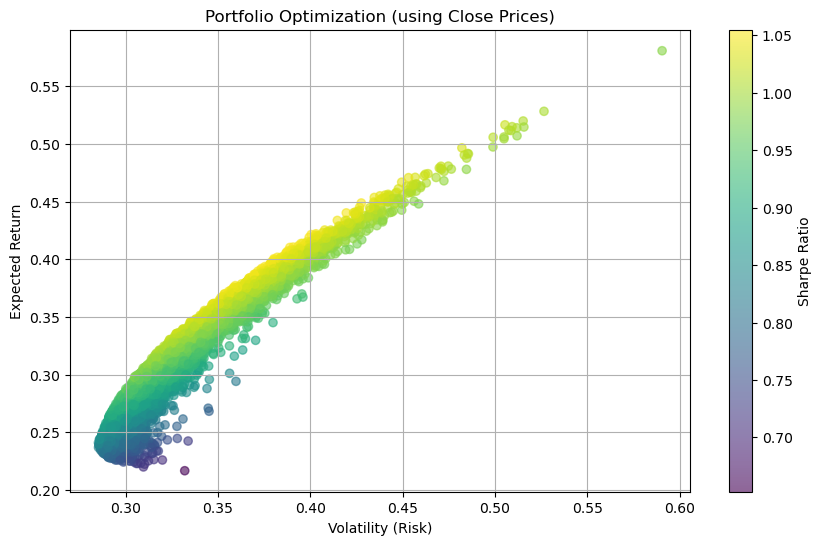

In [17]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization (using Close Prices)')
plt.grid(True)
plt.show()